In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydot

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist = keras.datasets.mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [5]:
# plt.imshow(X_train_full[7])
# X_train_full[1]
X_train_n.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [10]:
weights, biases = model.layers[1].get_weights()

In [11]:
biases.shape

(200,)

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [13]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 3s 2ms/step - loss: 1.1222 - accuracy: 0.6879 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3215 - accuracy: 0.9088 - val_loss: 0.2585 - val_accuracy: 0.9285
Epoch 3/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2588 - accuracy: 0.9259 - val_loss: 0.2254 - val_accuracy: 0.9387
Epoch 4/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2215 - accuracy: 0.9375 - val_loss: 0.1962 - val_accuracy: 0.9442
Epoch 5/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1972 - accuracy: 0.9434 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1709 - accuracy: 0.9516 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1502 - accuracy: 0.9573 - val_loss: 0.1482 - val_accuracy:

In [14]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1688}

In [15]:
model_history.history

{'loss': [0.6606810688972473,
  0.3006494641304016,
  0.24880272150039673,
  0.21511541306972504,
  0.18929407000541687,
  0.16899797320365906,
  0.1521173119544983,
  0.1378244012594223,
  0.12604959309101105,
  0.11574776470661163,
  0.10664829611778259,
  0.09911969304084778,
  0.09175663441419601,
  0.08570145070552826,
  0.08016057312488556,
  0.07516741007566452,
  0.070681132376194,
  0.06594182550907135,
  0.06245461106300354,
  0.05875406786799431,
  0.05553289130330086,
  0.05248429253697395,
  0.04958554357290268,
  0.04682096466422081,
  0.04429689422249794,
  0.042031966149806976,
  0.039840489625930786,
  0.03781098872423172,
  0.03579360991716385,
  0.033864062279462814],
 'accuracy': [0.8267222046852112,
  0.9140740633010864,
  0.9292222261428833,
  0.9389259219169617,
  0.9461666941642761,
  0.9517592787742615,
  0.9569629430770874,
  0.9610370397567749,
  0.9642592668533325,
  0.967296302318573,
  0.9698148369789124,
  0.9723148345947266,
  0.9746296405792236,
  0.976

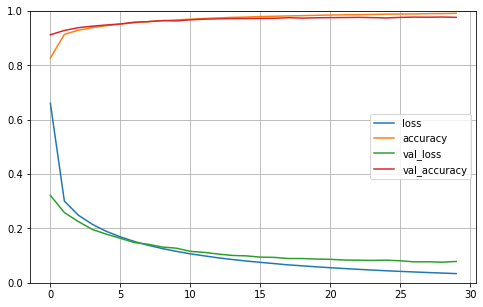

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
# overall training parameters

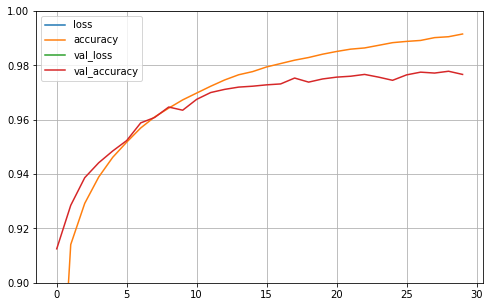

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.9, 1)
plt.show()
# accuracy convergence

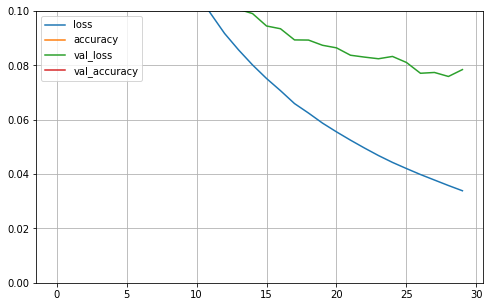

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.1)
plt.show()
# error convergence

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 944us/step - loss: 0.0770 - accuracy: 0.9768


[0.07699082046747208, 0.9768000245094299]

In [20]:
X_new = X_test[:5]

In [21]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.01]],
      dtype=float32)

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4])

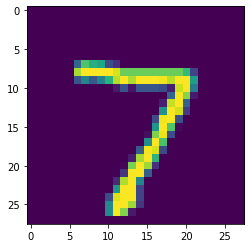

In [25]:
plt.imshow(X_new[0]) # should be 7